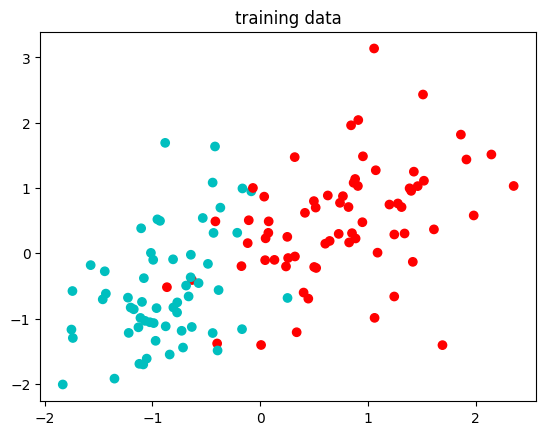

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import itertools

#load data points
in_data = loadmat('face_emotion_data.mat')
#print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['X']
y_train = in_data['y']

# n_eval = np.size(y_eval)
# n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()


[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


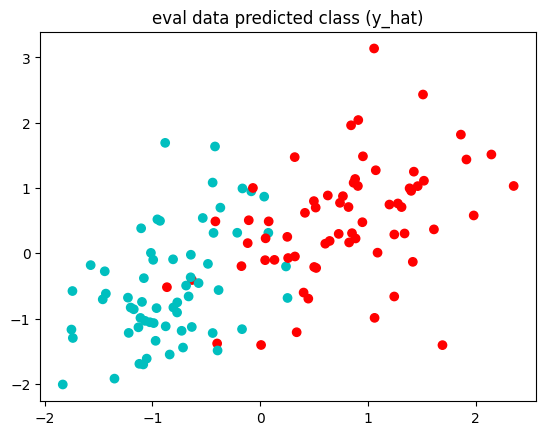

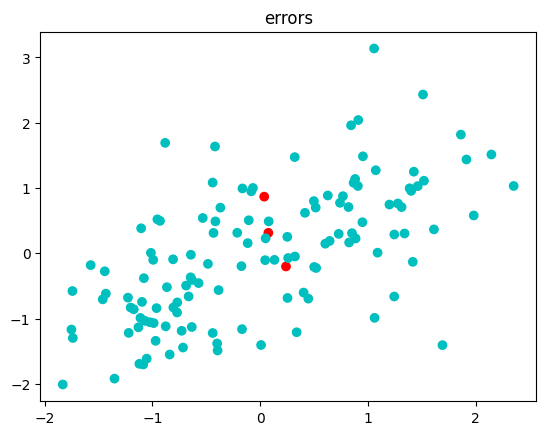

Error: 3
Error rate: 0.0234375


In [34]:
# Trainig using w = (A^T A)^(-1)A^T d

w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
print(w_opt)
y_prediction = np.sign(x_train@w_opt)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_prediction[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()

# calculate error
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))
print('Error rate: ' + (str(sum(error_vec_2)/ y_hat.size)))



[[ 0.70546316]
 [ 0.8737872 ]
 [-0.78805643]]


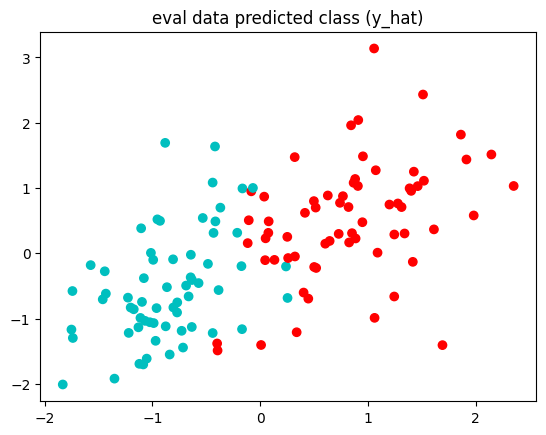

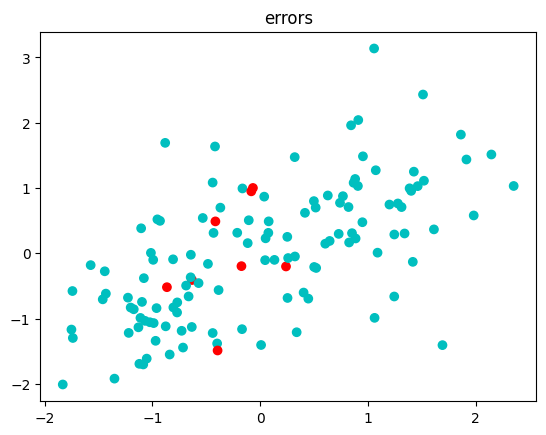

Error: 8
Error rate: 0.0625


In [33]:
#train with three most relevent features
T_three = x_train[:, [0, 2, 3]]
w_three_opt = np.linalg.inv(T_three.transpose()@T_three)@T_three.transpose()@y_train
print(w_three_opt)
y_three_prediction = np.sign(T_three@w_three_opt)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_three_prediction[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()

#Calculate error
error_three_features = [0 if i[0]==i[1] else 1 for i in np.hstack((y_three_prediction, y_train))]
plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==0 else 'r' for i in error_three_features])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_three_features)))
print('Error rate: ' + (str(sum(error_three_features)/ y_hat.size)))


In [2]:
#load data points
in_data = loadmat('face_emotion_data.mat')
#print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['X']
y_train = in_data['y']

errorlist=[]
for i in range(8):
    start_index = i*16
    end_index = (i+1)*16

    #split into training and test sets
    X_seven_subsets=np.vstack((x_train[0:start_index, :], x_train[end_index:-1, :]))
    Y_seven_subsets=np.vstack((y_train[0:start_index, :], y_train[end_index:-1, :]))
    
    X_val=x_train[start_index:end_index, :]
    y_val=y_train[start_index:end_index, :]
 
    # calculate w
    w_weight=np.linalg.inv(X_seven_subsets.T@X_seven_subsets)@X_seven_subsets.T@Y_seven_subsets
    y_predict=np.sign(X_val@w_weight)
    errorlist.append(np.mean(y_val!=y_predict))
    avg_err=np.mean(errorlist)
    print("Average error rate is %.2f%% "%(avg_err*100))

Average error rate is 6.25% 
Average error rate is 6.25% 
Average error rate is 8.33% 
Average error rate is 7.81% 
Average error rate is 6.25% 
Average error rate is 6.25% 
Average error rate is 5.36% 
Average error rate is 4.69% 
